# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas seaborn

In [306]:
# 필요한 라이브러리를 불러오세요.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [94]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

---

# (실습준비) 데이터 불러오기부터

In [359]:
import pandas as pd

# 학습 데이터 로딩
air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )


In [420]:
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

In [308]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [309]:
air_21.head(30)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19
5,서울 종로구,도시대기,111123,종로구,2021100106,0.003,0.5,0.002,0.025,22.0,14.0,서울 종로구 종로35가길 19
6,서울 종로구,도시대기,111123,종로구,2021100107,0.003,0.5,0.002,0.024,25.0,14.0,서울 종로구 종로35가길 19
7,서울 종로구,도시대기,111123,종로구,2021100108,0.003,0.5,0.005,0.023,24.0,14.0,서울 종로구 종로35가길 19
8,서울 종로구,도시대기,111123,종로구,2021100109,0.003,0.5,0.011,0.020,23.0,12.0,서울 종로구 종로35가길 19
9,서울 종로구,도시대기,111123,종로구,2021100110,0.003,0.6,0.026,0.016,40.0,22.0,서울 종로구 종로35가길 19


---

# 1. 이상치/결측치 처리

#### [실습문제1] 미세먼지 데이터 결측치 처리
* 미세먼지 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.


* 앞서 데이터 불러오기 및 분석 단계에서 확인한 불필요한 변수에 대해 제거 해 주세요. 

### 단일 데이터 버리기

In [360]:
drop_single_data = ['지역', '망', '측정소코드', '측정소명', '주소']

In [361]:
air_21.drop(columns=drop_single_data, axis=1, inplace=True)

In [362]:
air_22.drop(columns = drop_single_data, axis=1, inplace=True)

### nan 변수 제거

In [327]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21.isna().sum()

측정일시      0
SO2     112
CO       80
O3       97
NO2      80
PM10    105
PM25     97
dtype: int64

In [141]:
air_22.isna().sum()

측정일시     0
SO2     21
CO      21
O3      21
NO2     21
PM10    38
PM25    25
dtype: int64

In [38]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(air_21[['SO2']])

MinMaxScaler()

In [363]:
imp_mean = IterativeImputer(random_state=0)
df_filled = imp_mean.fit_transform(air_21[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']])

In [364]:
df_filled = pd.DataFrame(df_filled, columns=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'])

In [365]:
air_21['SO2'] = df_filled['SO2']
air_21['CO'] = df_filled['CO']
air_21['O3'] = df_filled['O3']
air_21['NO2'] = df_filled['NO2']
air_21['PM10'] = df_filled['PM10']
air_21['PM25'] = df_filled['PM25']

In [366]:
air_21.isna().sum()

측정일시    0
SO2     0
CO      0
O3      0
NO2     0
PM10    0
PM25    0
dtype: int64

In [367]:
imp_mean = IterativeImputer(random_state=0)
df_filled = imp_mean.fit_transform(air_22[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']])

In [368]:
df_filled = pd.DataFrame(df_filled, columns=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'])

In [369]:
air_22['SO2'] = df_filled['SO2']
air_22['CO'] = df_filled['CO']
air_22['O3'] = df_filled['O3']
air_22['NO2'] = df_filled['NO2']
air_22['PM10'] = df_filled['PM10']
air_22['PM25'] = df_filled['PM25']

In [370]:
air_22.isna().sum()

측정일시    0
SO2     0
CO      0
O3      0
NO2     0
PM10    0
PM25    0
dtype: int64

In [371]:
air_21

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0
...,...,...,...,...,...,...,...
8755,2021093020,0.003,0.7,0.020,0.036,35.0,24.0
8756,2021093021,0.003,0.6,0.016,0.035,34.0,21.0
8757,2021093022,0.003,0.6,0.012,0.036,30.0,19.0
8758,2021093023,0.003,0.6,0.004,0.042,33.0,19.0


In [55]:
imputer = KNNImputer()
df_filled = imputer.fit_transform(air_21[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']])

In [56]:
df_filled = pd.DataFrame(df_filled, columns=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'])

In [59]:
air_21['SO2'] = df_filled['SO2']
air_21['CO'] = df_filled['CO']
air_21['O3'] = df_filled['O3']
air_21['NO2'] = df_filled['NO2']
air_21['PM10'] = df_filled['PM10']
air_21['PM25'] = df_filled['PM25']

In [61]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0


In [60]:
air_21.isna().sum()

측정일시    0
SO2     0
CO      0
O3      0
NO2     0
PM10    0
PM25    0
dtype: int64

In [142]:
scaler.fit(air_22[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']])
imputer = KNNImputer()
df_filled3 = imputer.fit_transform(air_22[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']])
df_filled3 = pd.DataFrame(df_filled3, columns=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'])

air_22['SO2'] = df_filled3['SO2']
air_22['CO'] = df_filled3['CO']
air_22['O3'] = df_filled3['O3']
air_22['NO2'] = df_filled3['NO2']
air_22['PM10'] = df_filled3['PM10']
air_22['PM25'] = df_filled3['PM25']
display(air_22.head())

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2022010101,0.003,0.4,0.026,0.016,23.0,12.0
1,2022010102,0.003,0.4,0.022,0.020,20.0,9.0
2,2022010103,0.003,0.5,0.014,0.028,20.0,9.0
3,2022010104,0.003,0.5,0.016,0.027,19.0,10.0
4,2022010105,0.003,0.5,0.005,0.040,24.0,11.0


In [143]:
air_22.isna().sum()

측정일시    0
SO2     0
CO      0
O3      0
NO2     0
PM10    0
PM25    0
dtype: int64

#### [실습문제2] 날씨 데이터 결측치 처리
* 날씨 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.

* '강우량'을 어떻게 해야할까요?

### nan 데이터 버리기

In [372]:
weather_21.isna().sum()

지점                  0
지점명                 0
일시                  0
기온(°C)              0
기온 QC플래그         8759
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍속 QC플래그         8757
풍향(16방위)            2
풍향 QC플래그         8757
습도(%)               0
습도 QC플래그         8759
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       8759
해면기압(hPa)           0
해면기압 QC플래그       8759
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
지면상태(지면상태코드)     8759
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그       8735
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [421]:
drop_allna = ['기온 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '습도 QC플래그', 
              '현지기압 QC플래그', '해면기압 QC플래그', '지면상태(지면상태코드)']

In [422]:
weather_21.drop(columns=drop_allna, axis=1, inplace=True)

In [375]:
weather_21.isna().sum()

지점                  0
지점명                 0
일시                  0
기온(°C)              0
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그       8735
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [376]:
weather_21['지점'].unique()

array([108], dtype=int64)

In [423]:
weather_22.drop(columns=drop_allna, axis=1, inplace=True)

In [424]:
weather_22.isna().sum()


지점                  0
지점명                 0
일시                  0
기온(°C)              0
강수량(mm)          2079
강수량 QC플래그        1778
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일조 QC플래그         1071
일사(MJ/m2)        1089
일사 QC플래그         1071
적설(cm)           2020
3시간신적설(cm)       2145
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1221
최저운고(100m )      1417
시정(10m)             0
현상번호(국내식)        1742
지면온도(°C)            0
지면온도 QC플래그       2153
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

### 단일 데이터 제거

In [425]:
drop_single_data2 = ['지점', '지점명']

In [426]:
weather_21.drop(columns=drop_single_data2, axis=1, inplace=True)

In [381]:
weather_21.isna().sum()

일시                  0
기온(°C)              0
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그       8735
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [427]:
weather_22.drop(columns=drop_single_data2, axis=1, inplace=True)

In [383]:
weather_22.isna().sum()

일시                  0
기온(°C)              0
강수량(mm)          2079
강수량 QC플래그        1778
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일조 QC플래그         1071
일사(MJ/m2)        1089
일사 QC플래그         1071
적설(cm)           2020
3시간신적설(cm)       2145
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1221
최저운고(100m )      1417
시정(10m)             0
현상번호(국내식)        1742
지면온도(°C)            0
지면온도 QC플래그       2153
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

### QC 플래그 제거

In [428]:
drop_qcflag = ['강수량 QC플래그', '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그']

In [429]:
weather_21.drop(columns=drop_qcflag, axis=1, inplace=True)

In [430]:
weather_21.isna().sum()

일시                  0
기온(°C)              0
강수량(mm)          7810
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일사(MJ/m2)        3968
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
현상번호(국내식)        6634
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [431]:
weather_22.drop(columns=drop_qcflag, axis=1, inplace=True)
weather_22.isna().sum()

일시                  0
기온(°C)              0
강수량(mm)          2079
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일사(MJ/m2)        1089
적설(cm)           2020
3시간신적설(cm)       2145
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1221
최저운고(100m )      1417
시정(10m)             0
현상번호(국내식)        1742
지면온도(°C)            0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

### 0으로 채우기

In [90]:
!pip install missingno

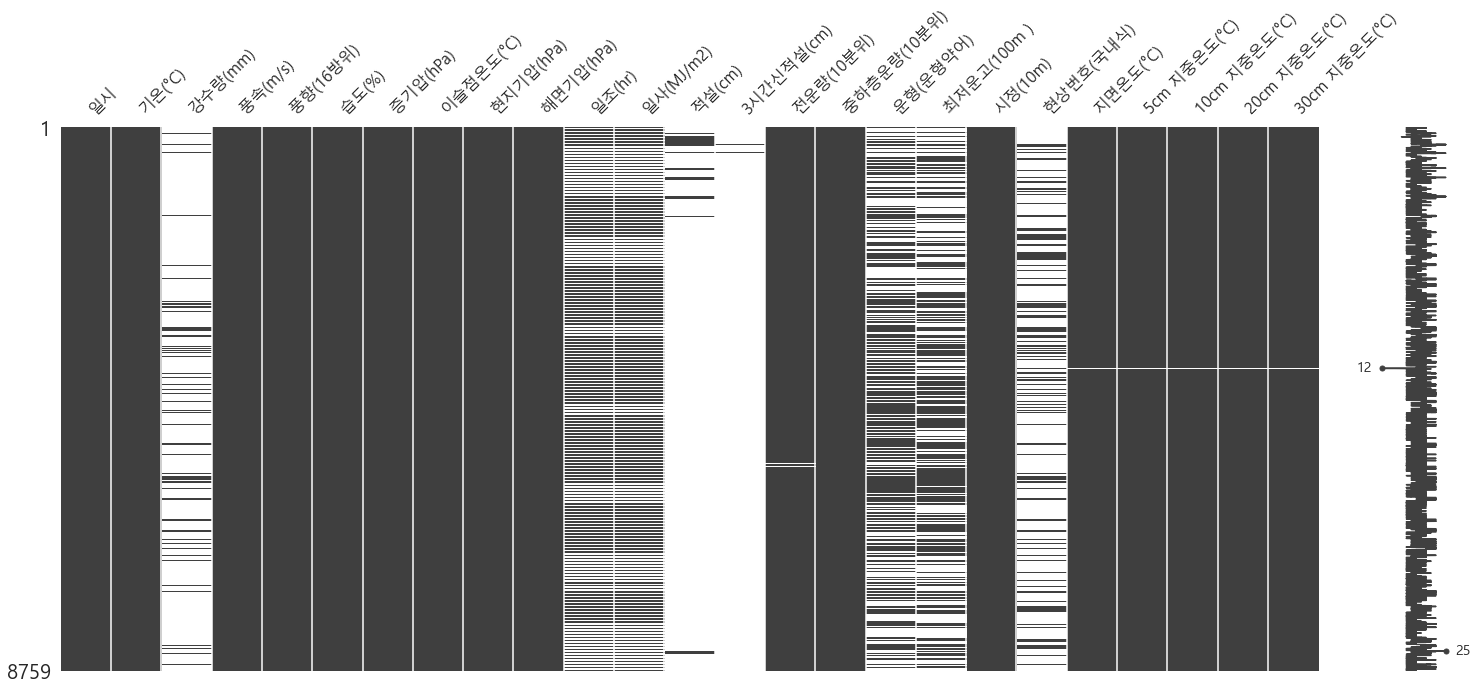

In [95]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(weather_21)
plt.show()

In [432]:
fill_0 = ['강수량(mm)', '일조(hr)', '일사(MJ/m2)', '3시간신적설(cm)', '적설(cm)']

In [433]:
weather_21['강수량(mm)'].fillna(0, inplace=True)
weather_21['일조(hr)'].fillna(0, inplace=True)
weather_21['일사(MJ/m2)'].fillna(0, inplace=True)
weather_21['3시간신적설(cm)'].fillna(0, inplace=True)
weather_21['적설(cm)'].fillna(0, inplace=True)

In [434]:
weather_21.isna().sum()

일시                  0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)              0
일사(MJ/m2)           0
적설(cm)              0
3시간신적설(cm)          0
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
현상번호(국내식)        6634
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [435]:
weather_22['강수량(mm)'].fillna(0, inplace=True)
weather_22['일조(hr)'].fillna(0, inplace=True)
weather_22['일사(MJ/m2)'].fillna(0, inplace=True)
weather_22['3시간신적설(cm)'].fillna(0, inplace=True)
weather_22['적설(cm)'].fillna(0, inplace=True)

In [436]:
weather_22.isna().sum()

일시                  0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)              0
일사(MJ/m2)           0
적설(cm)              0
3시간신적설(cm)          0
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1221
최저운고(100m )      1417
시정(10m)             0
현상번호(국내식)        1742
지면온도(°C)            0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

In [437]:
drop_things = ['현상번호(국내식)', '운형(운형약어)', '전운량(10분위)', '중하층운량(10분위)']

In [438]:
weather_21.drop(columns=drop_things, axis=1, inplace=True)

In [439]:
weather_22.drop(columns=drop_things, axis=1, inplace=True)

In [440]:
weather_21.isna().sum()

일시                  0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)              0
일사(MJ/m2)           0
적설(cm)              0
3시간신적설(cm)          0
최저운고(100m )      4212
시정(10m)             0
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [441]:
drop_things2 = ['5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

In [442]:
weather_21.drop(columns=drop_things2, axis=1, inplace=True)
weather_21

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C)
0,2021-01-01 01:00,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,NaN,2000,-6.9
1,2021-01-01 02:00,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,0.0,0.0,0.0,0.0,NaN,2000,-7.1
2,2021-01-01 03:00,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,0.0,0.0,0.0,0.0,NaN,2000,-7.3
3,2021-01-01 04:00,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,0.0,0.0,0.0,0.0,NaN,2000,-7.5
4,2021-01-01 05:00,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,0.0,0.0,0.0,0.0,NaN,2000,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021-12-31 19:00,-6.4,0.0,2.2,250.0,34,1.3,-19.7,1021.1,1032.3,0.0,0.0,0.0,0.0,NaN,2000,-4.5
8755,2021-12-31 20:00,-6.3,0.0,4.1,320.0,35,1.3,-19.2,1021.2,1032.4,0.0,0.0,0.0,0.0,NaN,2000,-5.3
8756,2021-12-31 21:00,-6.7,0.0,4.8,320.0,36,1.3,-19.3,1021.2,1032.4,0.0,0.0,0.0,0.0,NaN,2000,-5.7
8757,2021-12-31 22:00,-7.5,0.0,3.0,320.0,37,1.3,-19.7,1021.8,1033.1,0.0,0.0,0.0,0.0,NaN,2000,-6.2


In [443]:
weather_22.drop(columns=drop_things2, axis=1, inplace=True)
weather_22

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C)
0,2022-01-01 00:00,-8.5,0.0,1.9,320,41,1.3,-19.4,1021.9,1033.2,0.0,0.0,0.0,0.0,NaN,2000,-7.0
1,2022-01-01 01:00,-9.2,0.0,1.8,270,42,1.3,-19.7,1022.2,1033.6,0.0,0.0,0.0,0.0,NaN,2000,-7.2
2,2022-01-01 02:00,-9.5,0.0,1.2,270,43,1.3,-19.7,1022.3,1033.7,0.0,0.0,0.0,0.0,NaN,2000,-7.5
3,2022-01-01 03:00,-9.3,0.0,1.4,290,46,1.4,-18.8,1022.6,1034.0,0.0,0.0,0.0,0.0,NaN,2000,-7.6
4,2022-01-01 04:00,-9.6,0.0,1.7,340,48,1.4,-18.5,1021.9,1033.3,0.0,0.0,0.0,0.0,NaN,2000,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2022-03-31 19:00,12.3,0.0,2.9,340,47,6.7,1.2,1013.4,1023.8,0.4,0.2,0.0,0.0,9.0,2000,10.0
2156,2022-03-31 20:00,11.6,0.0,2.7,340,48,6.5,0.9,1014.6,1025.0,0.0,0.0,0.0,0.0,NaN,2000,8.9
2157,2022-03-31 21:00,10.5,0.0,3.5,320,51,6.4,0.7,1015.4,1025.9,0.0,0.0,0.0,0.0,10.0,2000,7.8
2158,2022-03-31 22:00,9.3,0.0,1.9,50,58,6.8,1.4,1016.4,1026.9,0.0,0.0,0.0,0.0,10.0,2000,7.3


In [444]:
weather_22.isna().sum()

일시                0
기온(°C)            0
강수량(mm)           0
풍속(m/s)           0
풍향(16방위)          0
습도(%)             0
증기압(hPa)          0
이슬점온도(°C)         0
현지기압(hPa)         0
해면기압(hPa)         0
일조(hr)            0
일사(MJ/m2)         0
적설(cm)            0
3시간신적설(cm)        0
최저운고(100m )    1417
시정(10m)           0
지면온도(°C)          0
dtype: int64

In [445]:
df_filled = imputer.fit_transform(weather_21[['풍속(m/s)', '최저운고(100m )', '지면온도(°C)']])
df_filled = pd.DataFrame(df_filled, columns=['풍속(m/s)', '최저운고(100m )', '지면온도(°C)'])
weather_21['풍속(m/s)'] = df_filled['풍속(m/s)']
weather_21['최저운고(100m )'] = df_filled['최저운고(100m )']
weather_21['지면온도(°C)'] = df_filled['지면온도(°C)']


In [446]:
weather_21.isna().sum()

일시             0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
풍향(16방위)       2
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
해면기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
적설(cm)         0
3시간신적설(cm)     0
최저운고(100m )    0
시정(10m)        0
지면온도(°C)       0
dtype: int64

In [447]:
df_filled = imputer.fit_transform(weather_22[['최저운고(100m )']])
df_filled = pd.DataFrame(df_filled, columns=['최저운고(100m )'])
weather_22['최저운고(100m )'] = df_filled['최저운고(100m )']


In [448]:
weather_22.isna().sum()

일시             0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
풍향(16방위)       0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
해면기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
적설(cm)         0
3시간신적설(cm)     0
최저운고(100m )    0
시정(10m)        0
지면온도(°C)       0
dtype: int64

In [450]:
weather_21['풍향(16방위)'].fillna(method='ffill', inplace=True)

In [451]:
weather_21.isna().sum()

일시             0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
풍향(16방위)       0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
해면기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
적설(cm)         0
3시간신적설(cm)     0
최저운고(100m )    0
시정(10m)        0
지면온도(°C)       0
dtype: int64

#### [실습문제3] air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성하기


* air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [452]:
air_21['측정일시'] = air_21['측정일시']-1

In [453]:
air_22['측정일시'] = air_22['측정일시']-1

In [454]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from datetime import datetime
air_21['측정일시'] = pd.to_datetime(air_21['측정일시'], format='%Y%m%d%H')
air_21['측정일시']
#air_21['측정일시']
#time = datetime.strptime(air_21['측정일시'], '%Y%m%d%H')

0      2021-10-01 00:00:00
1      2021-10-01 01:00:00
2      2021-10-01 02:00:00
3      2021-10-01 03:00:00
4      2021-10-01 04:00:00
               ...        
8755   2021-09-30 19:00:00
8756   2021-09-30 20:00:00
8757   2021-09-30 21:00:00
8758   2021-09-30 22:00:00
8759   2021-09-30 23:00:00
Name: 측정일시, Length: 8760, dtype: datetime64[ns]

In [455]:
air_22['측정일시'] = pd.to_datetime(air_22['측정일시'], format='%Y%m%d%H')
air_22['측정일시']

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
2155   2022-03-31 19:00:00
2156   2022-03-31 20:00:00
2157   2022-03-31 21:00:00
2158   2022-03-31 22:00:00
2159   2022-03-31 23:00:00
Name: 측정일시, Length: 2160, dtype: datetime64[ns]

In [456]:
air_21 = air_21.rename(columns={'측정일시':'일시'})

In [457]:
air_22 = air_22.rename(columns={'측정일시':'일시'})

#### [실습문제4] weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성하기


* weather_21, weather_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [458]:
weather_21['일시']

0       2021-01-01 01:00
1       2021-01-01 02:00
2       2021-01-01 03:00
3       2021-01-01 04:00
4       2021-01-01 05:00
              ...       
8754    2021-12-31 19:00
8755    2021-12-31 20:00
8756    2021-12-31 21:00
8757    2021-12-31 22:00
8758    2021-12-31 23:00
Name: 일시, Length: 8759, dtype: object

In [460]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

weather_21['일시'] = pd.to_datetime(weather_21['일시'], format='%Y-%m-%d %H')
weather_21['일시']


0      2021-01-01 01:00:00
1      2021-01-01 02:00:00
2      2021-01-01 03:00:00
3      2021-01-01 04:00:00
4      2021-01-01 05:00:00
               ...        
8754   2021-12-31 19:00:00
8755   2021-12-31 20:00:00
8756   2021-12-31 21:00:00
8757   2021-12-31 22:00:00
8758   2021-12-31 23:00:00
Name: 일시, Length: 8759, dtype: datetime64[ns]

In [462]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

weather_22['일시'] = pd.to_datetime(weather_22['일시'], format='%Y-%m-%d %H')
weather_22['일시']


0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
2155   2022-03-31 19:00:00
2156   2022-03-31 20:00:00
2157   2022-03-31 21:00:00
2158   2022-03-31 22:00:00
2159   2022-03-31 23:00:00
Name: 일시, Length: 2160, dtype: datetime64[ns]

---

# 2. 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보겠습니다

#### [실습문제5] 데이터 합치기
* 'df_21','df_22'에 21년도와 22년도의 미세먼지, 날씨 데이터를 합쳐 넣도록 하겠습니다.

In [463]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_21 = pd.merge(air_21, weather_21, on='일시')



In [464]:
df_21

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C)
0,2021-10-01 00:00:00,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,...,16.2,998.8,1008.7,0.0,0.00,0.0,0.0,12.8,2000,17.8
1,2021-10-01 01:00:00,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,...,16.1,998.8,1008.7,0.0,0.00,0.0,0.0,22.8,2000,17.4
2,2021-10-01 02:00:00,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,...,16.4,998.9,1008.8,0.0,0.00,0.0,0.0,21.4,2000,17.2
3,2021-10-01 03:00:00,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,...,16.3,998.1,1008.1,0.0,0.00,0.0,0.0,23.2,2000,17.0
4,2021-10-01 04:00:00,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,...,15.9,997.9,1007.9,0.0,0.00,0.0,0.0,11.6,2000,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021-09-30 19:00:00,0.003,0.7,0.020,0.036,35.0,24.0,22.7,0.0,0.2,...,17.1,998.4,1008.2,0.0,0.01,0.0,0.0,34.0,2000,20.6
8755,2021-09-30 20:00:00,0.003,0.6,0.016,0.035,34.0,21.0,21.7,0.0,0.9,...,17.8,998.8,1008.6,0.0,0.00,0.0,0.0,20.0,2000,19.9
8756,2021-09-30 21:00:00,0.003,0.6,0.012,0.036,30.0,19.0,20.9,0.0,0.4,...,17.8,999.2,1009.1,0.0,0.00,0.0,0.0,7.0,2000,19.2
8757,2021-09-30 22:00:00,0.003,0.6,0.004,0.042,33.0,19.0,20.4,0.0,0.8,...,17.0,999.2,1009.1,0.0,0.00,0.0,0.0,7.2,2000,18.6


In [465]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_22 = pd.merge(air_22, weather_22, on='일시')



In [466]:
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   일시           2160 non-null   datetime64[ns]
 1   SO2          2160 non-null   float64       
 2   CO           2160 non-null   float64       
 3   O3           2160 non-null   float64       
 4   NO2          2160 non-null   float64       
 5   PM10         2160 non-null   float64       
 6   PM25         2160 non-null   float64       
 7   기온(°C)       2160 non-null   float64       
 8   강수량(mm)      2160 non-null   float64       
 9   풍속(m/s)      2160 non-null   float64       
 10  풍향(16방위)     2160 non-null   int64         
 11  습도(%)        2160 non-null   int64         
 12  증기압(hPa)     2160 non-null   float64       
 13  이슬점온도(°C)    2160 non-null   float64       
 14  현지기압(hPa)    2160 non-null   float64       
 15  해면기압(hPa)    2160 non-null   float64       
 16  일조(hr)

#### [실습문제6] 각종 인자 추가 및 사용하지 않을 변수 제거

* 새로운 인자를 추가 하세요.


* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다




In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다



#### [실습문제7] 미세먼지 농도 다음시점 데이터 생성

* t+1 시점 데이터 생성

In [473]:
df_21.drop(columns='next_PM25', axis=1, inplace=True)

In [474]:
df_22.drop(columns='next_PM25', axis=1, inplace=True)

In [467]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_21['next_PM10'] = df_21['PM10'].shift(-1)


In [477]:
df_21

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C),next_PM10
0,2021-10-01 00:00:00,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,...,998.8,1008.7,0.0,0.00,0.0,0.0,12.8,2000,17.8,27.0
1,2021-10-01 01:00:00,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,...,998.8,1008.7,0.0,0.00,0.0,0.0,22.8,2000,17.4,28.0
2,2021-10-01 02:00:00,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,...,998.9,1008.8,0.0,0.00,0.0,0.0,21.4,2000,17.2,26.0
3,2021-10-01 03:00:00,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,...,998.1,1008.1,0.0,0.00,0.0,0.0,23.2,2000,17.0,26.0
4,2021-10-01 04:00:00,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,...,997.9,1007.9,0.0,0.00,0.0,0.0,11.6,2000,16.5,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,2021-09-30 18:00:00,0.003,0.5,0.038,0.024,36.0,24.0,24.2,0.0,2.3,...,998.3,1008.0,0.9,0.36,0.0,0.0,22.0,2000,22.5,35.0
8754,2021-09-30 19:00:00,0.003,0.7,0.020,0.036,35.0,24.0,22.7,0.0,0.2,...,998.4,1008.2,0.0,0.01,0.0,0.0,34.0,2000,20.6,34.0
8755,2021-09-30 20:00:00,0.003,0.6,0.016,0.035,34.0,21.0,21.7,0.0,0.9,...,998.8,1008.6,0.0,0.00,0.0,0.0,20.0,2000,19.9,30.0
8756,2021-09-30 21:00:00,0.003,0.6,0.012,0.036,30.0,19.0,20.9,0.0,0.4,...,999.2,1009.1,0.0,0.00,0.0,0.0,7.0,2000,19.2,33.0


In [469]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_22['next_PM10'] = df_22['PM10'].shift(-1)

In [476]:
df_22

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C),next_PM10
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,...,1021.9,1033.2,0.0,0.0,0.0,0.0,12.454913,2000,-7.0,20.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,...,1022.2,1033.6,0.0,0.0,0.0,0.0,12.454913,2000,-7.2,20.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,...,1022.3,1033.7,0.0,0.0,0.0,0.0,12.454913,2000,-7.5,19.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,...,1022.6,1034.0,0.0,0.0,0.0,0.0,12.454913,2000,-7.6,24.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,...,1021.9,1033.3,0.0,0.0,0.0,0.0,12.454913,2000,-7.6,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2022-03-31 19:00:00,0.002,0.4,0.036,0.017,11.0,8.0,12.3,0.0,2.9,...,1013.4,1023.8,0.4,0.2,0.0,0.0,9.000000,2000,10.0,10.0
2156,2022-03-31 20:00:00,0.002,0.4,0.032,0.018,10.0,7.0,11.6,0.0,2.7,...,1014.6,1025.0,0.0,0.0,0.0,0.0,12.454913,2000,8.9,11.0
2157,2022-03-31 21:00:00,0.003,0.3,0.038,0.013,11.0,5.0,10.5,0.0,3.5,...,1015.4,1025.9,0.0,0.0,0.0,0.0,10.000000,2000,7.8,11.0
2158,2022-03-31 22:00:00,0.003,0.3,0.036,0.015,11.0,5.0,9.3,0.0,1.9,...,1016.4,1026.9,0.0,0.0,0.0,0.0,10.000000,2000,7.3,9.0


---

# 3. train / test split

#### [실습문제7] 데이터셋 나누기 

* 데이터셋을 train(21년도 데이터), test(22년도 데이터)로 나눠 csv로 저장하도록 하겠습니다.


* train_x / train_y / test_x / test_y 로 나누세요.


* train_x.csv / train_y.csv / test_x.csv / test_y.csv 로 저장하세요.

In [471]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_21.drop(df_21.tail(1).index, inplace=True)


In [478]:
display(df_21)

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C),next_PM10
0,2021-10-01 00:00:00,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,...,998.8,1008.7,0.0,0.00,0.0,0.0,12.8,2000,17.8,27.0
1,2021-10-01 01:00:00,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,...,998.8,1008.7,0.0,0.00,0.0,0.0,22.8,2000,17.4,28.0
2,2021-10-01 02:00:00,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,...,998.9,1008.8,0.0,0.00,0.0,0.0,21.4,2000,17.2,26.0
3,2021-10-01 03:00:00,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,...,998.1,1008.1,0.0,0.00,0.0,0.0,23.2,2000,17.0,26.0
4,2021-10-01 04:00:00,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,...,997.9,1007.9,0.0,0.00,0.0,0.0,11.6,2000,16.5,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,2021-09-30 18:00:00,0.003,0.5,0.038,0.024,36.0,24.0,24.2,0.0,2.3,...,998.3,1008.0,0.9,0.36,0.0,0.0,22.0,2000,22.5,35.0
8754,2021-09-30 19:00:00,0.003,0.7,0.020,0.036,35.0,24.0,22.7,0.0,0.2,...,998.4,1008.2,0.0,0.01,0.0,0.0,34.0,2000,20.6,34.0
8755,2021-09-30 20:00:00,0.003,0.6,0.016,0.035,34.0,21.0,21.7,0.0,0.9,...,998.8,1008.6,0.0,0.00,0.0,0.0,20.0,2000,19.9,30.0
8756,2021-09-30 21:00:00,0.003,0.6,0.012,0.036,30.0,19.0,20.9,0.0,0.4,...,999.2,1009.1,0.0,0.00,0.0,0.0,7.0,2000,19.2,33.0


In [479]:
df_22.drop(df_22.tail(1).index, inplace=True)

In [480]:
df_22

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C),next_PM10
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,...,1021.9,1033.2,0.0,0.00,0.0,0.0,12.454913,2000,-7.0,20.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,...,1022.2,1033.6,0.0,0.00,0.0,0.0,12.454913,2000,-7.2,20.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,...,1022.3,1033.7,0.0,0.00,0.0,0.0,12.454913,2000,-7.5,19.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,...,1022.6,1034.0,0.0,0.00,0.0,0.0,12.454913,2000,-7.6,24.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,...,1021.9,1033.3,0.0,0.00,0.0,0.0,12.454913,2000,-7.6,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2022-03-31 18:00:00,0.002,0.4,0.044,0.010,10.0,9.0,13.2,0.0,4.3,...,1013.1,1023.4,0.1,0.53,0.0,0.0,12.454913,2000,12.4,11.0
2155,2022-03-31 19:00:00,0.002,0.4,0.036,0.017,11.0,8.0,12.3,0.0,2.9,...,1013.4,1023.8,0.4,0.20,0.0,0.0,9.000000,2000,10.0,10.0
2156,2022-03-31 20:00:00,0.002,0.4,0.032,0.018,10.0,7.0,11.6,0.0,2.7,...,1014.6,1025.0,0.0,0.00,0.0,0.0,12.454913,2000,8.9,11.0
2157,2022-03-31 21:00:00,0.003,0.3,0.038,0.013,11.0,5.0,10.5,0.0,3.5,...,1015.4,1025.9,0.0,0.00,0.0,0.0,10.000000,2000,7.8,11.0


In [481]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
target = ['next_PM10']
train_x = df_21.drop(columns=target, axis=1)
train_y = df_21.loc[:, target]

In [482]:
train_x

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),최저운고(100m ),시정(10m),지면온도(°C)
0,2021-10-01 00:00:00,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,...,16.2,998.8,1008.7,0.0,0.00,0.0,0.0,12.8,2000,17.8
1,2021-10-01 01:00:00,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,...,16.1,998.8,1008.7,0.0,0.00,0.0,0.0,22.8,2000,17.4
2,2021-10-01 02:00:00,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,...,16.4,998.9,1008.8,0.0,0.00,0.0,0.0,21.4,2000,17.2
3,2021-10-01 03:00:00,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,...,16.3,998.1,1008.1,0.0,0.00,0.0,0.0,23.2,2000,17.0
4,2021-10-01 04:00:00,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,...,15.9,997.9,1007.9,0.0,0.00,0.0,0.0,11.6,2000,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,2021-09-30 18:00:00,0.003,0.5,0.038,0.024,36.0,24.0,24.2,0.0,2.3,...,18.3,998.3,1008.0,0.9,0.36,0.0,0.0,22.0,2000,22.5
8754,2021-09-30 19:00:00,0.003,0.7,0.020,0.036,35.0,24.0,22.7,0.0,0.2,...,17.1,998.4,1008.2,0.0,0.01,0.0,0.0,34.0,2000,20.6
8755,2021-09-30 20:00:00,0.003,0.6,0.016,0.035,34.0,21.0,21.7,0.0,0.9,...,17.8,998.8,1008.6,0.0,0.00,0.0,0.0,20.0,2000,19.9
8756,2021-09-30 21:00:00,0.003,0.6,0.012,0.036,30.0,19.0,20.9,0.0,0.4,...,17.8,999.2,1009.1,0.0,0.00,0.0,0.0,7.0,2000,19.2


In [483]:
train_y

,next_PM10
0,27.0
1,28.0
2,26.0
3,26.0
4,22.0
...,...
8753,35.0
8754,34.0
8755,30.0
8756,33.0


In [484]:
test_x = df_22.drop(columns=target, axis=1)
test_y = df_22.loc[:, target]

In [485]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 0 to 8757
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   일시           8758 non-null   datetime64[ns]
 1   SO2          8758 non-null   float64       
 2   CO           8758 non-null   float64       
 3   O3           8758 non-null   float64       
 4   NO2          8758 non-null   float64       
 5   PM10         8758 non-null   float64       
 6   PM25         8758 non-null   float64       
 7   기온(°C)       8758 non-null   float64       
 8   강수량(mm)      8758 non-null   float64       
 9   풍속(m/s)      8758 non-null   float64       
 10  풍향(16방위)     8758 non-null   float64       
 11  습도(%)        8758 non-null   int64         
 12  증기압(hPa)     8758 non-null   float64       
 13  이슬점온도(°C)    8758 non-null   float64       
 14  현지기압(hPa)    8758 non-null   float64       
 15  해면기압(hPa)    8758 non-null   float64       
 16  일조(hr)

In [486]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   일시           2159 non-null   datetime64[ns]
 1   SO2          2159 non-null   float64       
 2   CO           2159 non-null   float64       
 3   O3           2159 non-null   float64       
 4   NO2          2159 non-null   float64       
 5   PM10         2159 non-null   float64       
 6   PM25         2159 non-null   float64       
 7   기온(°C)       2159 non-null   float64       
 8   강수량(mm)      2159 non-null   float64       
 9   풍속(m/s)      2159 non-null   float64       
 10  풍향(16방위)     2159 non-null   int64         
 11  습도(%)        2159 non-null   int64         
 12  증기압(hPa)     2159 non-null   float64       
 13  이슬점온도(°C)    2159 non-null   float64       
 14  현지기압(hPa)    2159 non-null   float64       
 15  해면기압(hPa)    2159 non-null   float64       
 16  일조(hr)

In [487]:
test_y

,next_PM10
0,20.0
1,20.0
2,19.0
3,24.0
4,19.0
...,...
2154,11.0
2155,10.0
2156,11.0
2157,11.0


In [488]:
train_x.to_csv('train_x.csv', mode='w')

In [489]:
train_y.to_csv('train_y.csv', mode='w')

In [490]:
test_x.to_csv('test_x.csv', mode='w')

In [491]:
test_y.to_csv('test_y.csv', mode='w')

---